In [1]:
from keras import layers
from keras.models import Sequential
from numpy.random import seed
from tensorflow import set_random_seed

# set seed for reproducible results
seed(123)
set_random_seed(123)

Using TensorFlow backend.


In [2]:
model = Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten_1 (Flatten)          (None, 576)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                36928     
__________

In [3]:
from keras.datasets import mnist
from keras.utils import to_categorical

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype('float32') / 255

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

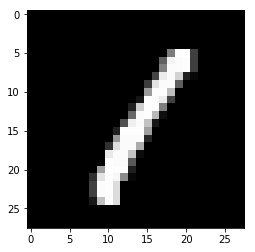

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(train_images[3].reshape(28,28), cmap='gray', interpolation='none')

In [5]:
model.compile(optimizer='rmsprop',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

model.fit(train_images, train_labels, epochs=1, batch_size=64)

Epoch 1/1
60000/60000 [==============================] - 72s 1ms/step - loss: 0.1687 - acc: 0.9470


In [7]:
model = Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='tanh', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='tanh'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='tanh'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='tanh'))
model.add(layers.Dense(10, activation='softmax'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten_2 (Flatten)          (None, 576)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 64)                36928     
__________

In [8]:
model.compile(optimizer='rmsprop',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

model.fit(train_images, train_labels, epochs=1, batch_size=64)

Epoch 1/1
60000/60000 [==============================] - 73s 1ms/step - loss: 0.1462 - acc: 0.9573


In [9]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Test loss = ', test_loss)
print('Test Accuracy = ', test_acc)

10000/10000 [==============================] - 4s 386us/step
Test loss =  0.05380383705850691
Test Accuracy =  0.983


In [10]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Test loss = ', test_loss)
print('Test Accuracy = ', test_acc)

10000/10000 [==============================] - 4s 398us/step
Test loss =  0.05380383705850691
Test Accuracy =  0.983


In [11]:
model = Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='sigmoid', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='sigmoid'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='sigmoid'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='sigmoid'))
model.add(layers.Dense(10, activation='softmax'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten_3 (Flatten)          (None, 576)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 64)                36928     
__________

In [12]:
model.compile(optimizer='rmsprop',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

model.fit(train_images, train_labels, epochs=1, batch_size=64)

Epoch 1/1
60000/60000 [==============================] - 75s 1ms/step - loss: 0.8626 - acc: 0.7262


In [13]:
model = Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.25))
model.add(layers.Flatten())
# model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(10, activation='softmax'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_11 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_7 (Dense)              (None, 128)               1179776   
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
__________

In [14]:
model.compile(optimizer='rmsprop',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

model.fit(train_images, train_labels, epochs=1, batch_size=64)

Epoch 1/1
60000/60000 [==============================] - 234s 4ms/step - loss: 0.1889 - acc: 0.9439


In [15]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Test loss = ', test_loss)
print('Test Accuracy = ', test_acc)

10000/10000 [==============================] - 13s 1ms/step
Test loss =  0.05975540661297273
Test Accuracy =  0.9794


In [16]:
model = Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='tanh', input_shape=(28, 28, 1)))
model.add(layers.Conv2D(64, (3, 3), activation='tanh'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.25))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='tanh'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(10, activation='softmax'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_9 (Dense)              (None, 128)               1179776   
_________________________________________________________________
dropout_4 (Dropout)          (None, 128)               0         
__________

In [17]:
model.compile(optimizer='rmsprop',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

model.fit(train_images, train_labels, epochs=1, batch_size=64)


Epoch 1/1
60000/60000 [==============================] - 229s 4ms/step - loss: 0.1979 - acc: 0.9421


In [18]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Test loss = ', test_loss)
print('Test Accuracy = ', test_acc)

10000/10000 [==============================] - 14s 1ms/step
Test loss =  0.06988342687953264
Test Accuracy =  0.9791


In [26]:
model = Sequential()
model.add(layers.Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=(28,28,1)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Dropout(0.25))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(10, activation='softmax'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_21 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_11 (Dropout)         (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_9 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_16 (Dense)             (None, 128)               1179776   
_________________________________________________________________
dropout_12 (Dropout)         (None, 128)               0         
__________

In [27]:
model.compile(optimizer='rmsprop',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

model.fit(train_images, train_labels, epochs=5, batch_size=128)


Epoch 1/5
60000/60000 [==============================] - 389s 6ms/step - loss: 0.2163 - acc: 0.9334
Epoch 2/5
60000/60000 [==============================] - 356s 6ms/step - loss: 0.0811 - acc: 0.9760
Epoch 3/5
60000/60000 [==============================] - 188s 3ms/step - loss: 0.0625 - acc: 0.9819
Epoch 4/5
60000/60000 [==============================] - 307s 5ms/step - loss: 0.0515 - acc: 0.9844
Epoch 5/5
60000/60000 [==============================] - 228s 4ms/step - loss: 0.0488 - acc: 0.9859


In [28]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Test loss = ', test_loss)
print('Test Accuracy = ', test_acc)

10000/10000 [==============================] - 10s 1ms/step
Test loss =  0.045608684881113006
Test Accuracy =  0.9863
